# Компьютерное зрение

# Описание проекта
Сетевой супермаркет «Хлеб-Соль» внедряет систему компьютерного зрения для обработки фотографий покупателей. Фотофиксация в прикассовой зоне поможет определять возраст клиентов, чтобы:
    • Анализировать покупки и предлагать товары, которые могут заинтересовать покупателей этой возрастной группы;
    • Контролировать добросовестность кассиров при продаже алкоголя.
    
**Цель:**
Построить модель, которая по фотографии определит приблизительный возраст человека. 

**Задачи:**
1. Провести исследовательский анализ данных:
    - Посмотреть на размер выборки.
    - Построить график распределения возраста в выборке.
    - Напечать на экране 10–15 фотографий и посмотреть, как устроен датасет.
    - Сделайте выводы о том, как результаты исследования повлияют на обучение модели.
2. Подготовить данные к обучению.
3. Обучить нейронную сеть и рассчитать её качество.
   - Добиться метрики на тестовой выборке не больше 8.
4. Проанализировать результат обучения модели. 

**Описание данных:**
Данные взяты с сайта ChaLearn Looking at People.
Данные представляют собой набор: одна папка со всеми изображениями и CSV-файл двумя колонками: file_name и real_age.

In [1]:
# Загрузка библиолиотек
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import mean_absolute_error

# Исследовательский анализ данных

In [2]:
def examination(gen): #функция проверки генератора
    if gen.samples > 0:  
        feat, tar = next(gen)
        print("Размер features:", feat.shape)  
        print("Размер target:", tar.shape)      
    else:
        print("Генератор пуст! Нужно проверить пути и данные.")

## Размер выборки

In [3]:
data = pd.read_csv('/datasets/faces/labels.csv')
display(data.head(10))
data.info()

,file_name,real_age
0,000000.jpg,4
1,000001.jpg,18
2,000002.jpg,80
3,000003.jpg,50
4,000004.jpg,17
5,000005.jpg,27
6,000006.jpg,24
7,000007.jpg,43
8,000008.jpg,26
9,000009.jpg,39


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  7591 non-null   object
 1   real_age   7591 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 118.7+ KB


Итак, выборка содержит 7591 изображение. Количество меток соответствует количеству изображений. Метки имеют целочисленный тип.

## График распределения возраста в выборке

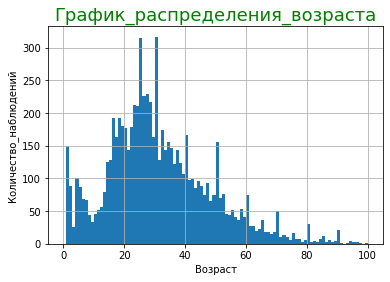

In [4]:
data['real_age'].hist(bins=100, range=(0,100))
plt.title('График_распределения_возраста',fontsize=18, color='green')
plt.xlabel('Возраст')
plt.ylabel('Количество_наблюдений')
plt.grid(True)
plt.show()

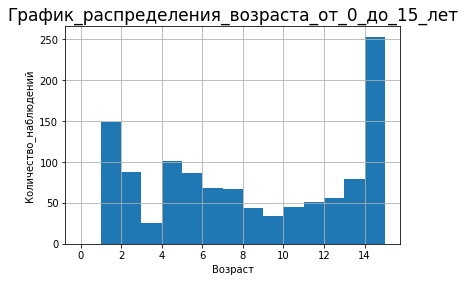

In [5]:
data['real_age'].hist(bins=15, range=(0,15))
plt.title('График_распределения_возраста_от_0_до_15_лет',fontsize=17)
plt.xlabel('Возраст')
plt.ylabel('Количество_наблюдений')
plt.grid(True)
plt.show()

Взглянем и на ящик с усами.

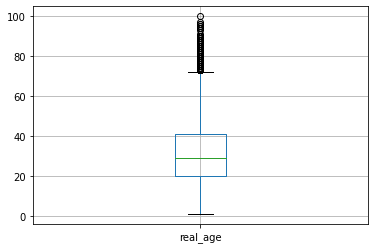

In [6]:
data.boxplot('real_age')
plt.show()

In [7]:
data['real_age'].describe() #статистика

count    7591.000000
mean       31.201159
std        17.145060
min         1.000000
25%        20.000000
50%        29.000000
75%        41.000000
max       100.000000
Name: real_age, dtype: float64

Итак, возраст потенциальных покупателей распределен таким образом, что рассматриваются покупатели от 1 года до 100 лет. Наличие покупателей до 4 лет вызывает сомнение, но их достаточно много - около 300. Основная часть людей на фотографиях имеют возраст 16-25 лет, их более 1,5 тыс. Есть провалы в количестве фотографий 3, 8-10 летних (каждого возраста меньше 50 фото), это ухудшает качество предсказаний. Потенциальных покупателей от 70 до 100 лет немного - это выбросы.

## Устройство датасета

In [8]:
datagen = ImageDataGenerator()

# Создание генератора
datagen = ImageDataGenerator(rescale=1./255)
generator_flow=datagen.flow_from_dataframe(
    dataframe=data,
    directory='/datasets/faces/final_files',
    x_col='file_name',
    y_col='real_age',
    target_size=(150, 150),
    batch_size=12,
    class_mode='raw',
    seed=84
)

Found 7591 validated image filenames.


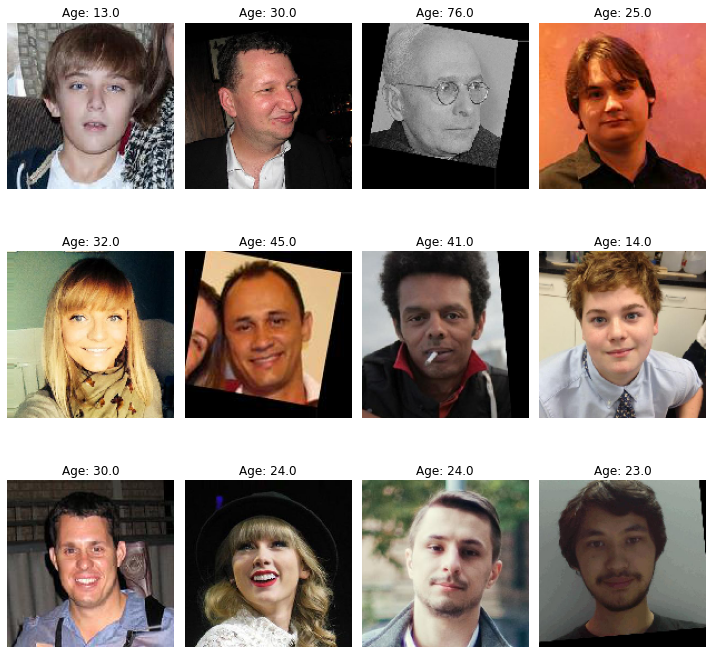

In [9]:
features,target = next(generator_flow)

fig = plt.figure(figsize=(10,10))

for i in range(12):
    ax=fig.add_subplot(3,4,i+1)
    ax.imshow(features[i])
    ax.set_title(f"Age: {target[i]:.1f}")
    ax.axis('off')
plt.tight_layout()
plt.show()    

Датасет содержит самые разнообразные фотографии людей и их возрасты. Многие изображения уже с аугментацией, применялся поворот, смещение, возможно отражение по горизонтали. Загруженные изображения имеют размер 150х150 пикселей, 3 канала. Метки в целом соответствуют изображениям.

## Предварительный вывод:

Данные содержат 7591 изображение с метками. Количество меток соответствует количеству изображений. Метки имеют целочисленный тип.

Возраст потенциальных покупателей распределен таким образом, что рассматриваются покупатели от 1 года до 100 лет. Наличие покупателей до 4 лет вызывает сомнение, но их достаточно много - около 300. Основная часть людей на фотографиях имеют возраст 16-25 лет, их более 1,5 тыс. Есть провалы в количестве фотографий 3, 8-10 летних (каждого возраста меньше 50 фото), это ухудшает качество предсказаний. Потенциальных покупателей от 70 до 100 лет немного - это выбросы.

Загрузчик нашел все 7591 изображения. Датасет содержит самые разнообразные портреты людей и их возрасты. Многие изображения уже с аугментацией, применялся поворот, смещение, возможно отражение по горизонтали. Люди на портретах в разных положениях, т.е. с разными поворотами головы. Загружена партия из 12 фотографий  с метками. Изображения имеют размер 150х150 пикселей, 3 канала. Метки возраста в целом соответствуют изображениям.

Различное положение головы и искажения изображений помогут качественно обучить нейросеть. Дополнительная аугментация не понадобится. В качестве функции потерь стоит применить функцию, устойчивую к выбросам - MAE.

# Подготовка данных

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
from tensorflow.keras.applications.resnet import ResNet50

def load_train(path):
    datagen = ImageDataGenerator(validation_split=0.25, rescale=1./255)

    df = pd.read_csv(path +'labels.csv')
    
    train_datagen_flow = datagen.flow_from_dataframe(
    dataframe=df,
    directory=path +'final_files',
    x_col='file_name',
    y_col='real_age',
    target_size=(150, 150),
    batch_size=32,
    class_mode='raw',
    subset='training',    
    seed=12345
    )
    
    return train_datagen_flow
    
def load_test(path):
    datagen = ImageDataGenerator(validation_split=0.25, rescale=1./255)

    df = pd.read_csv(path +'labels.csv')
    
    test_datagen_flow = datagen.flow_from_dataframe(
    dataframe=df,
    directory=path +'final_files',
    x_col='file_name',
    y_col='real_age',
    target_size=(150, 150),
    batch_size=32,
    class_mode='raw',
    seed=12345,
    subset='validation'    
    )
    
    return test_datagen_flow    

def create_model(input_shape):
    backbone = ResNet50(input_shape=(150, 150, 3),
                    weights='imagenet', 
                    include_top=False)
    
    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(BatchNormalization())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.6))
    model.add(Dense(1))

    optimizer = Adam(lr=0.0001)
    model.compile(optimizer=optimizer, loss=tf.keras.losses.MAE, metrics=['mae'])          

    return model


def train_model(model, train_data, test_data, batch_size=None, epochs=10, steps_per_epoch=None, validation_steps=None): 
    
    if steps_per_epoch is None:
        steps_per_epoch = len(train_data)
    if validation_steps is None:
        validation_steps = len(test_data)
    
    model.fit(train_data,
          validation_data=test_data,
          batch_size=batch_size,
          epochs=epochs,
          steps_per_epoch=steps_per_epoch,
          validation_steps=validation_steps,
          verbose=2)
    

    return model

# Обучение

Модель обучена и показала результат МАЕ=6,9836 на тестовых данных.

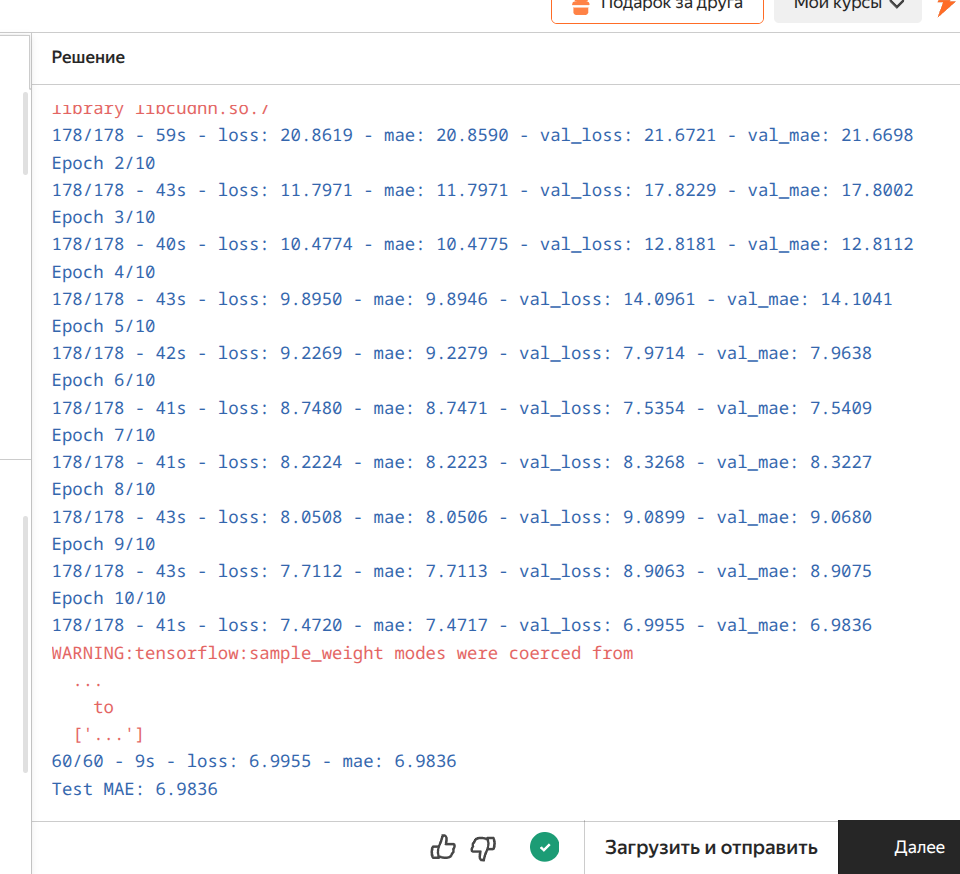

# Анализ результата обучения модели

Сравним с моделью, которая предсказывает медианный возраст.

In [10]:
def load_train(path):
    datagen = ImageDataGenerator(validation_split=0.25, rescale=1./255)

    df = pd.read_csv(path +'labels.csv')
    
    train_datagen_flow = datagen.flow_from_dataframe(
    dataframe=df,
    directory=path +'/final_files',
    x_col='file_name',
    y_col='real_age',
    target_size=(150, 150),
    batch_size=32,
    class_mode='raw',
    subset='training',    
    seed=84
    )
    
    return train_datagen_flow

In [11]:
train_datagen_flow = load_train('/datasets/faces/')

Found 5694 validated image filenames.


In [12]:
examination(train_datagen_flow)

Размер features: (32, 150, 150, 3)
Размер target: (32,)


In [13]:
def load_test(path):
    datagen = ImageDataGenerator(validation_split=0.25, rescale=1./255)

    df = pd.read_csv(path +'labels.csv')
     
    test_datagen_flow = datagen.flow_from_dataframe(
    dataframe=df,
    directory=path +'final_files',
    x_col='file_name',
    y_col='real_age',
    target_size=(150, 150),
    batch_size=32,
    class_mode='raw',
    seed=84,
    subset='validation'    
    )
    
    return test_datagen_flow

test_datagen_flow = load_test('/datasets/faces/')

examination(test_datagen_flow)

Found 1897 validated image filenames.
Размер features: (32, 150, 150, 3)
Размер target: (32,)


In [14]:

all_ages = []
train_datagen_flow.reset()

for i in range(len(train_datagen_flow)):
    _, y_batch = next(train_datagen_flow)
    all_ages.extend(y_batch)

median_age = np.median(all_ages)
print(f"Медианный возраст: {median_age:.2f}")

Медианный возраст: 29.00


In [15]:
def baseline_predict(X):
    return np.full((X.shape[0], 1), median_age)

In [16]:
test_datagen_flow.reset()
total_mae = 0.0
total_samples = 0

for i in range(len(test_datagen_flow)):
    X_batch, y_batch = next(test_datagen_flow)
    y_pred = baseline_predict(X_batch)
    total_mae += mean_absolute_error(y_batch, y_pred) * len(y_batch)
    total_samples += len(y_batch)

mae_baseline = total_mae / total_samples
print(f"MAE бейзлайна (среднее): {mae_baseline:.2f} лет")

MAE бейзлайна (среднее): 12.91 лет


**ВЫВОД:** Найдена модель, сверточная нейросеть, которая определяет возраст человека по фотографии с точностью до 6,9836 лет. 

Модель оценивалась на метрике MAE, т.к. данные содержат выбросы. Модель достаточно качественная. По сравнению с простой моделью предсказания медианы, где MAE 12,91 лет, она хорошо определяет возраст.

Модель немного переобучилась: MAE train (7,4717) > MAE test (6,9836).

В возрасте 25 лет и более ошибка 6,9836 некритична, потому что если модель и ошибется в меньшую сторону, и определит 18 и более лет, то алкоголь покупателю уже можно продать. А в более старшем возрасте люди с разницей в почти 7 лет во многом похожи. Критично продать алкоголь покупателю которому 11 лет, а модель определит его как совершеннолетнего. Покупателям до 25 лет, по-прежнему обязателньо предъявлять паспорт.